# Higgs Dataset Signal/Background Detection Model 
> Blog post contains summary of a mini-project on Higgs Dataset from UCI Repo. It involves the classification of Higgs's signal/Background Noise.

- toc: true 
- badges: true
- comments: true
- categories: [DeepLearning, NeuralNetworks, TensorFlow, Classification]
- image: images/higgsmodel.png



The Higgs Dataset is one of the largest dataset containing labelled data whether a signal is actual higgs signal or of the background. This is a Classification problem to distinguish between a signal process which produces Higgs bosons and a background process which does not.

*source of the dataset: Daniel Whiteson daniel '@' uci.edu, Assistant Professor, Physics & Astronomy, Univ. of California Irvine*

### Downloading the Dataset:

First, we are goint to download the dataset from the UCI Machine Learning repository and since it is in the .gz (zip format) format we are going to unzip the data and get the data ready for processing.  

**Data Set Information:**

The data has been produced using Monte Carlo simulations. The first 21 features (columns 2-22) are kinematic properties measured by the particle detectors in the accelerator. The last seven features are functions of the first 21 features; these are high-level features derived by physicists to help discriminate between the two classes. There is an interest in using deep learning methods to obviate the need for physicists to manually develop such features. Benchmark results using Bayesian Decision Trees from a standard physics package and 5-layer neural networks are presented in the original paper. The last 500,000 examples are used as a test set.



In [1]:

!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz"

--2022-03-21 13:33:43--  https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2816407858 (2.6G) [application/x-httpd-php]
Saving to: ‘HIGGS.csv.gz’

HIGGS.csv.gz        100%[===================>]   2.62G  56.5MB/s    in 49s     

2022-03-21 13:34:32 (55.3 MB/s) - ‘HIGGS.csv.gz’ saved [2816407858/2816407858]



In [2]:
!gzip -d HIGGS.csv.gz

### Processing the Data:

The most important step after unzipping the data is to process the data inorder to visualize and get to know our data better.  

**Note: The First column named 'labels' has values of 0/1 which denotes signal/background respectively**  

**1 for Signal**  
**0 for Background**

In [3]:
# Import pandas library 
import pandas as pd

In [4]:
columns = ["labels","lepton pT", "lepton eta", "lepton phi", "missing energy magnitude", "missing energy phi", "jet 1 pt", "jet 1 eta", "jet 1 phi", "jet 1 b-tag", "jet 2 pt", "jet 2 eta", "jet 2 phi", "jet 2 b-tag", "jet 3 pt", "jet 3 eta", "jet 3 phi", "jet 3 b-tag", "jet 4 pt", "jet 4 eta", "jet 4 phi", "jet 4 b-tag", "m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb", "m_wwbb"]
higgs_df = pd.read_csv("/content/HIGGS.csv", header= None, names = columns)

In [5]:
higgs_df

,labels,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999995,1.0,1.159912,1.013847,0.108615,1.495524,-0.537545,2.342396,-0.839740,1.320683,0.000000,...,-0.097068,1.190680,3.101961,0.822136,0.766772,1.002191,1.061233,0.837004,0.860472,0.772484
10999996,1.0,0.618388,-1.012982,1.110139,0.941023,-0.379199,1.004656,0.348535,-1.678593,2.173076,...,-0.216995,1.049177,3.101961,0.826829,0.989809,1.029104,1.199679,0.891481,0.938490,0.865269
10999997,1.0,0.700559,0.774251,1.520182,0.847112,0.211230,1.095531,0.052457,0.024553,2.173076,...,1.585235,1.713962,0.000000,0.337374,0.845208,0.987610,0.883422,1.888438,1.153766,0.931279
10999998,0.0,1.178030,0.117796,-1.276980,1.864457,-0.584370,0.998519,-1.264549,1.276333,0.000000,...,1.399515,-1.313189,0.000000,0.838842,0.882890,1.201380,0.939216,0.339705,0.759070,0.719119


In [6]:
y = higgs_df["labels"]
y

0           1.0
1           1.0
2           1.0
3           0.0
4           1.0
           ... 
10999995    1.0
10999996    1.0
10999997    1.0
10999998    0.0
10999999    0.0
Name: labels, Length: 11000000, dtype: float64

In [7]:
X = higgs_df.drop(columns = 'labels')
X

,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,1.374992,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999995,1.159912,1.013847,0.108615,1.495524,-0.537545,2.342396,-0.839740,1.320683,0.000000,1.858587,...,-0.097068,1.190680,3.101961,0.822136,0.766772,1.002191,1.061233,0.837004,0.860472,0.772484
10999996,0.618388,-1.012982,1.110139,0.941023,-0.379199,1.004656,0.348535,-1.678593,2.173076,1.002570,...,-0.216995,1.049177,3.101961,0.826829,0.989809,1.029104,1.199679,0.891481,0.938490,0.865269
10999997,0.700559,0.774251,1.520182,0.847112,0.211230,1.095531,0.052457,0.024553,2.173076,1.345027,...,1.585235,1.713962,0.000000,0.337374,0.845208,0.987610,0.883422,1.888438,1.153766,0.931279
10999998,1.178030,0.117796,-1.276980,1.864457,-0.584370,0.998519,-1.264549,1.276333,0.000000,0.733136,...,1.399515,-1.313189,0.000000,0.838842,0.882890,1.201380,0.939216,0.339705,0.759070,0.719119


### MODEL 1: Dataset with 100,000 labelled examples
Instead of taking our entire dataset, which is very huge we are going to first try the 100,000 examples for better understanding the future prospects of our model. Insted of dividing the dataset serial-wise we are going to use `sample` method from pandas to randomnly sample 100k examples from our dataset. We are going to use the seed values as `42` for reproducing the results later.

In [8]:
higgs_df_subset =higgs_df.sample(n = 100000, random_state = 42)
higgs_df_subset

,labels,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
3967303,0.0,1.138683,-0.726635,-0.005790,0.204118,0.153842,1.585904,-0.045576,-1.448527,1.086538,...,-2.439800,0.073642,0.000000,1.790497,1.730592,0.980587,0.743065,2.378752,1.534863,1.227558
5946179,1.0,0.404633,1.014821,-1.050041,1.136441,-1.403536,3.218436,-1.944837,0.801788,0.000000,...,-1.174742,-0.912542,0.000000,1.072789,0.649697,0.981147,2.004577,0.521853,1.246037,1.461494
6910558,0.0,1.137585,0.325251,1.453598,0.804114,0.893516,0.418095,-1.164536,-0.585919,0.000000,...,0.280201,-0.982461,3.101961,0.816500,0.933867,0.988956,0.852772,0.415455,0.737194,0.691437
3414332,0.0,1.380438,-0.595149,-0.727112,0.465392,-0.057453,0.399224,-0.076273,1.080084,2.173076,...,1.261267,1.129085,0.000000,0.563342,0.857068,0.992465,0.875139,0.512037,0.686362,0.887047
5840458,1.0,0.962628,1.191110,-1.161568,1.541759,0.569159,1.337374,0.810973,0.458075,1.086538,...,0.413452,1.309431,3.101961,1.596246,1.146864,1.687726,1.178736,0.925320,1.094308,0.991339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6940991,1.0,1.658062,-1.514575,-1.074455,1.025077,-0.764209,0.513367,-0.426815,1.167121,2.173076,...,-1.269683,1.141848,0.000000,0.299132,0.709217,0.982156,1.063902,0.713939,0.774338,0.719043
6173277,1.0,1.630794,-0.020507,-1.192086,0.439244,-1.028369,0.626410,0.452510,-0.017682,2.173076,...,0.446765,1.228414,0.000000,0.632595,0.753355,0.995382,0.976956,0.799586,0.803552,0.732366
10306408,1.0,0.975988,-0.768516,0.726175,1.106153,-1.148883,1.221399,0.744627,-1.521705,0.000000,...,-1.624466,0.309479,0.000000,0.843619,0.920015,1.429457,1.390645,1.525701,1.106262,0.933373
1976752,0.0,1.596022,-0.063362,1.569564,0.424958,-1.012751,0.877414,0.106919,-0.186766,0.000000,...,0.924806,1.053062,0.000000,1.566598,1.086671,0.990974,1.040644,0.995528,0.882152,0.862665


In [12]:
higgs_df_subset.to_csv('higgs_dataset_subset.csv', index=False)

* We save the randomnly sampled data of 100k examples into a csv file for future use.

In [9]:
X= higgs_df_subset.drop(columns = "labels")
X

,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
3967303,1.138683,-0.726635,-0.005790,0.204118,0.153842,1.585904,-0.045576,-1.448527,1.086538,1.598471,...,-2.439800,0.073642,0.000000,1.790497,1.730592,0.980587,0.743065,2.378752,1.534863,1.227558
5946179,0.404633,1.014821,-1.050041,1.136441,-1.403536,3.218436,-1.944837,0.801788,0.000000,2.238942,...,-1.174742,-0.912542,0.000000,1.072789,0.649697,0.981147,2.004577,0.521853,1.246037,1.461494
6910558,1.137585,0.325251,1.453598,0.804114,0.893516,0.418095,-1.164536,-0.585919,0.000000,0.653565,...,0.280201,-0.982461,3.101961,0.816500,0.933867,0.988956,0.852772,0.415455,0.737194,0.691437
3414332,1.380438,-0.595149,-0.727112,0.465392,-0.057453,0.399224,-0.076273,1.080084,2.173076,0.644878,...,1.261267,1.129085,0.000000,0.563342,0.857068,0.992465,0.875139,0.512037,0.686362,0.887047
5840458,0.962628,1.191110,-1.161568,1.541759,0.569159,1.337374,0.810973,0.458075,1.086538,0.549946,...,0.413452,1.309431,3.101961,1.596246,1.146864,1.687726,1.178736,0.925320,1.094308,0.991339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6940991,1.658062,-1.514575,-1.074455,1.025077,-0.764209,0.513367,-0.426815,1.167121,2.173076,0.465213,...,-1.269683,1.141848,0.000000,0.299132,0.709217,0.982156,1.063902,0.713939,0.774338,0.719043
6173277,1.630794,-0.020507,-1.192086,0.439244,-1.028369,0.626410,0.452510,-0.017682,2.173076,0.661245,...,0.446765,1.228414,0.000000,0.632595,0.753355,0.995382,0.976956,0.799586,0.803552,0.732366
10306408,0.975988,-0.768516,0.726175,1.106153,-1.148883,1.221399,0.744627,-1.521705,0.000000,1.321105,...,-1.624466,0.309479,0.000000,0.843619,0.920015,1.429457,1.390645,1.525701,1.106262,0.933373
1976752,1.596022,-0.063362,1.569564,0.424958,-1.012751,0.877414,0.106919,-0.186766,0.000000,1.009872,...,0.924806,1.053062,0.000000,1.566598,1.086671,0.990974,1.040644,0.995528,0.882152,0.862665


In [10]:
y = higgs_df_subset["labels"]
y

3967303     0.0
5946179     1.0
6910558     0.0
3414332     0.0
5840458     1.0
           ... 
6940991     1.0
6173277     1.0
10306408    1.0
1976752     0.0
6832497     1.0
Name: labels, Length: 100000, dtype: float64

In [11]:
X.shape

(100000, 28)

* Here, we are going to divide the labelled dataset for supervised learning. We are extracting labels in to another variable 'y'.
* And we are dropping the labels and taking the other columns of the dataset into variable 'X', that will serve as input data or feature set to use it as input values in our model.

#### Splitting the data into Train and Test sets 

we use sklearn's `train_test_split` method to split the dataset into training set (which we will be using for training of our Neural network) and Test set(on which we can measure the accuracy and other metrics of our model). Test set is also called validation set in this context, it is used to measure how well our Neural network is generalizing for new data that it has not seen before. We are splitting 10 percent of the entire dataset into test set and other for training (since we Neural Networks need a lot of data to train better)

In [23]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.1, random_state=42, shuffle=True)


In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90000, 28), (10000, 28), (90000,), (10000,))

* We are importing some helper function to help us evaluate and visualize our model's results.

In [26]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-03-21 13:51:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-03-21 13:51:24 (72.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import confusion_matrix, plot_loss_curves, create_tensorboard_callback

#### Building a baseline model
We are going to build a baseline model with only two hidden layers and train it for 5 epochs. After viewing the results from our baseline model we can improve upon the model and tune our hyperparameters to make better predictions.


In [31]:
# Build the baseline model
import tensorflow as tf
tf.random.set_seed(42)

higgs_model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

higgs_model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ['accuracy'])

history_1 = higgs_model_1.fit(X_train, y_train, epochs = 5, validation_data = (X_test,y_test), callbacks =[create_tensorboard_callback(dir_name = "higgs_noise_detection_model", experiment_name='HIGGS_MODEL_NOISE_DETECTION_100K')])

Saving TensorBoard log files to: higgs_noise_detection_model/HIGGS_MODEL_NOISE_DETECTION_100K/20220321-135947
Epoch 1/5
2813/2813 [==============================] - 13s 5ms/step - loss: 0.6426 - accuracy: 0.6257 - val_loss: 0.6196 - val_accuracy: 0.6578
Epoch 2/5
2813/2813 [==============================] - 12s 4ms/step - loss: 0.6116 - accuracy: 0.6616 - val_loss: 0.6007 - val_accuracy: 0.6786
Epoch 3/5
2813/2813 [==============================] - 12s 4ms/step - loss: 0.5992 - accuracy: 0.6753 - val_loss: 0.6017 - val_accuracy: 0.6716
Epoch 4/5
2813/2813 [==============================] - 12s 4ms/step - loss: 0.5917 - accuracy: 0.6825 - val_loss: 0.5948 - val_accuracy: 0.6818
Epoch 5/5
2813/2813 [==============================] - 12s 4ms/step - loss: 0.5866 - accuracy: 0.6869 - val_loss: 0.5985 - val_accuracy: 0.6807


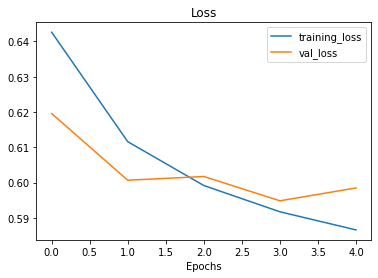

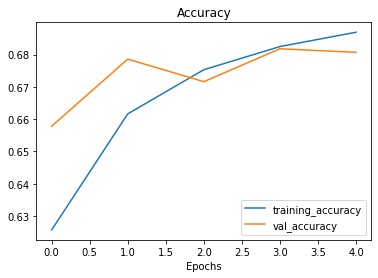

In [33]:
plot_loss_curves(history_1)

**The Training accuracy for our baseline model is 68.69%**.  
**The Validation accuracy of our baseline model is 68.07%**

Even though the metrics turned out not very good. Our model is good at generalizing the features it is leanring from training data so that it can perform well in our Validation data(the data which model has not seen before). **Our model is not overfitting**

#### Saving the Model


In [46]:
tf.keras.models.save_model(higgs_model_1,filepath = "/content/drive/MyDrive/higgs_model_100K" )

INFO:tensorflow:Assets written to: /content/drive/MyDrive/higgs_model_100K/assets


### MODEL 2: Dataset with 500,000 labelled examples
Instead of taking our entire dataset, which is very huge we are going to first try the 500,000 examples. We are going to use `sample` method from pandas to randomnly sample 500k examples from our dataset. We are going to use the seed values as `42` for reproducing the results later.

In [13]:
higgs_df_subset_500k =higgs_df.sample(n = 500000, random_state = 42)
higgs_df_subset_500k

,labels,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
3967303,0.0,1.138683,-0.726635,-0.005790,0.204118,0.153842,1.585904,-0.045576,-1.448527,1.086538,...,-2.439800,0.073642,0.000000,1.790497,1.730592,0.980587,0.743065,2.378752,1.534863,1.227558
5946179,1.0,0.404633,1.014821,-1.050041,1.136441,-1.403536,3.218436,-1.944837,0.801788,0.000000,...,-1.174742,-0.912542,0.000000,1.072789,0.649697,0.981147,2.004577,0.521853,1.246037,1.461494
6910558,0.0,1.137585,0.325251,1.453598,0.804114,0.893516,0.418095,-1.164536,-0.585919,0.000000,...,0.280201,-0.982461,3.101961,0.816500,0.933867,0.988956,0.852772,0.415455,0.737194,0.691437
3414332,0.0,1.380438,-0.595149,-0.727112,0.465392,-0.057453,0.399224,-0.076273,1.080084,2.173076,...,1.261267,1.129085,0.000000,0.563342,0.857068,0.992465,0.875139,0.512037,0.686362,0.887047
5840458,1.0,0.962628,1.191110,-1.161568,1.541759,0.569159,1.337374,0.810973,0.458075,1.086538,...,0.413452,1.309431,3.101961,1.596246,1.146864,1.687726,1.178736,0.925320,1.094308,0.991339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8516987,0.0,1.198344,0.816132,-1.315820,1.703112,1.590997,1.516191,-0.098058,0.060033,0.000000,...,-1.689426,-1.133952,0.000000,2.399341,1.443294,0.987323,0.837583,1.202728,1.357914,1.363805
5674844,0.0,2.187508,0.664192,0.996393,0.352704,-1.562939,0.953631,1.452642,-0.993939,1.086538,...,0.347659,-0.799340,0.000000,0.778314,0.849276,0.984151,0.952412,1.432241,1.072137,0.849107
8551407,1.0,0.461000,-0.296141,-1.404043,1.213896,0.447301,0.937691,0.091076,-0.865879,0.000000,...,0.296024,-0.269396,0.000000,0.792155,1.126328,1.031360,0.828597,0.912031,0.971815,0.864788
7118648,1.0,0.780717,0.816132,1.445830,1.954633,-1.285709,1.386109,0.427754,0.048392,2.173076,...,0.094481,1.542494,3.101961,0.915686,1.227426,1.077625,0.561643,0.828827,0.988427,0.864264


In [15]:
higgs_df_subset_500k.to_csv('higgs_dataset_subset_500k.csv', index=False)

In [17]:
X_1= higgs_df_subset_500k.drop(columns = "labels")

In [19]:
y_1 =higgs_df_subset_500k["labels"]

In [21]:
import sklearn
from sklearn.model_selection import train_test_split
X_train_1,X_test_1, y_train_1, y_test_1 = sklearn.model_selection.train_test_split(X_1,y_1, test_size=0.1, random_state=42, shuffle=True)

In [24]:
X_train_1.shape, X_test_1.shape, y_train_1.shape, y_test_1.shape

((450000, 28), (50000, 28), (450000,), (50000,))

In [36]:
# Build the baseline model with medium data set
import tensorflow as tf
tf.random.set_seed(42)

higgs_model_1_500k = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

higgs_model_1_500k.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ['accuracy'])

history_1_500k = higgs_model_1_500k.fit(X_train_1, y_train_1, epochs = 5, validation_data = (X_test_1,y_test_1), callbacks =[create_tensorboard_callback(dir_name = "higgs_noise_detection_model", experiment_name='HIGGS_MODEL_NOISE_DETECTION_WITH_500K')])

Saving TensorBoard log files to: higgs_noise_detection_model/HIGGS_MODEL_NOISE_DETECTION_WITH_500K/20220321-140419
Epoch 1/5
14063/14063 [==============================] - 60s 4ms/step - loss: 0.6103 - accuracy: 0.6623 - val_loss: 0.5893 - val_accuracy: 0.6793
Epoch 2/5
14063/14063 [==============================] - 58s 4ms/step - loss: 0.5810 - accuracy: 0.6915 - val_loss: 0.5740 - val_accuracy: 0.6994
Epoch 3/5
14063/14063 [==============================] - 59s 4ms/step - loss: 0.5690 - accuracy: 0.7014 - val_loss: 0.5649 - val_accuracy: 0.7041
Epoch 4/5
14063/14063 [==============================] - 59s 4ms/step - loss: 0.5617 - accuracy: 0.7082 - val_loss: 0.5565 - val_accuracy: 0.7130
Epoch 5/5
14063/14063 [==============================] - 59s 4ms/step - loss: 0.5563 - accuracy: 0.7120 - val_loss: 0.5574 - val_accuracy: 0.7123


In [37]:
higgs_model_1_500k.evaluate(X_test_1, y_test_1)

1563/1563 [==============================] - 4s 3ms/step - loss: 0.5574 - accuracy: 0.7123


[0.557417094707489, 0.7122799754142761]

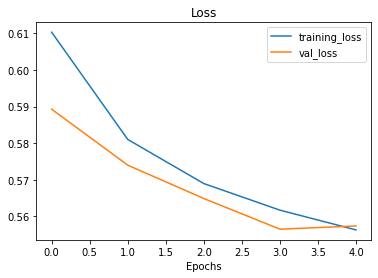

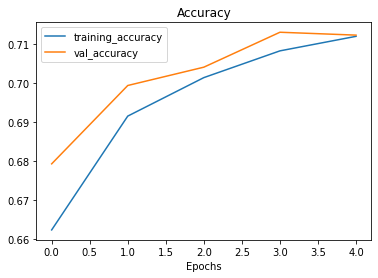

In [38]:
plot_loss_curves(history_1_500k)

In [47]:
tf.keras.models.save_model(higgs_model_1_500k,filepath = "/content/drive/MyDrive/higgs_model_500K" )

INFO:tensorflow:Assets written to: /content/drive/MyDrive/higgs_model_500K/assets


### MODEL 3: Dataset with 1 Million labelled examples
Instead of taking our entire dataset, which is very huge we are going to first try the 1,000,000 examples for better understanding the future prospects of our model. Insted of dividing the dataset serial-wise we are going to use `sample` method from pandas to randomnly sample 1 million examples from our dataset. We are going to use the seed values as `42` for reproducing the results later.

In [14]:
higgs_df_subset_1M =higgs_df.sample(n = 1000000, random_state = 42)
higgs_df_subset_1M

,labels,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
3967303,0.0,1.138683,-0.726635,-0.005790,0.204118,0.153842,1.585904,-0.045576,-1.448527,1.086538,...,-2.439800,0.073642,0.000000,1.790497,1.730592,0.980587,0.743065,2.378752,1.534863,1.227558
5946179,1.0,0.404633,1.014821,-1.050041,1.136441,-1.403536,3.218436,-1.944837,0.801788,0.000000,...,-1.174742,-0.912542,0.000000,1.072789,0.649697,0.981147,2.004577,0.521853,1.246037,1.461494
6910558,0.0,1.137585,0.325251,1.453598,0.804114,0.893516,0.418095,-1.164536,-0.585919,0.000000,...,0.280201,-0.982461,3.101961,0.816500,0.933867,0.988956,0.852772,0.415455,0.737194,0.691437
3414332,0.0,1.380438,-0.595149,-0.727112,0.465392,-0.057453,0.399224,-0.076273,1.080084,2.173076,...,1.261267,1.129085,0.000000,0.563342,0.857068,0.992465,0.875139,0.512037,0.686362,0.887047
5840458,1.0,0.962628,1.191110,-1.161568,1.541759,0.569159,1.337374,0.810973,0.458075,1.086538,...,0.413452,1.309431,3.101961,1.596246,1.146864,1.687726,1.178736,0.925320,1.094308,0.991339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244894,1.0,0.721422,1.623552,1.477457,0.686271,-0.281346,1.012260,1.695248,-0.722296,0.000000,...,0.872338,-0.759387,0.000000,0.503514,1.064794,0.986955,1.028497,1.186128,1.021383,0.876147
2331608,0.0,0.331612,-0.221145,-0.049624,1.204492,-0.422887,0.779944,-0.436717,0.490783,2.173076,...,-1.564503,-0.700011,0.000000,0.783572,1.037146,0.988166,1.016495,1.074260,0.905516,0.832388
2032527,1.0,0.400790,0.846325,0.566930,1.019508,-0.907278,0.905446,-0.064390,1.379447,0.000000,...,0.252718,-0.656728,3.101961,0.675152,0.846188,0.982969,0.755627,0.690340,0.628058,0.613142
10069137,1.0,1.094943,0.214219,-0.193333,1.558868,-0.447798,2.356229,-0.188169,1.575696,0.000000,...,0.600005,-0.633976,0.000000,1.553325,1.625376,1.000506,0.909016,0.317308,1.170940,1.174410


In [16]:
higgs_df_subset_1M.to_csv('higgs_dataset_subset_1M.csv', index=False)

In [18]:
X_2  = higgs_df_subset_1M.drop(columns = "labels")

In [20]:
y_2 = higgs_df_subset_1M["labels"]

In [22]:
import sklearn
from sklearn.model_selection import train_test_split
X_train_2,X_test_2, y_train_2, y_test_2 = sklearn.model_selection.train_test_split(X_2,y_2, test_size=0.1, random_state=42, shuffle=True)

In [25]:
X_train_2.shape, X_test_2.shape, y_train_2.shape, y_test_2.shape

((900000, 28), (100000, 28), (900000,), (100000,))

In [32]:
higgs_model_1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5985 - accuracy: 0.6807


[0.5984857678413391, 0.6807000041007996]

In [39]:
# Build the baseline model with 1million dataset
import tensorflow as tf
tf.random.set_seed(42)

higgs_model_1_1M = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

higgs_model_1_1M.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ['accuracy'])

history_1_1M = higgs_model_1_1M.fit(X_train_2, y_train_2, epochs = 5,validation_data = (X_test_2,y_test_2), callbacks =[create_tensorboard_callback(dir_name = "higgs_noise_detection_model", experiment_name='HIGGS_MODEL_NOISE_DETECTION_WITH_1M')])

Saving TensorBoard log files to: higgs_noise_detection_model/HIGGS_MODEL_NOISE_DETECTION_WITH_1M/20220321-140919
Epoch 1/5
28125/28125 [==============================] - 97s 3ms/step - loss: 0.5975 - accuracy: 0.6738 - val_loss: 0.5742 - val_accuracy: 0.6960
Epoch 2/5
28125/28125 [==============================] - 97s 3ms/step - loss: 0.5681 - accuracy: 0.7025 - val_loss: 0.5576 - val_accuracy: 0.7099
Epoch 3/5
28125/28125 [==============================] - 101s 4ms/step - loss: 0.5557 - accuracy: 0.7126 - val_loss: 0.5477 - val_accuracy: 0.7192
Epoch 4/5
28125/28125 [==============================] - 94s 3ms/step - loss: 0.5476 - accuracy: 0.7187 - val_loss: 0.5499 - val_accuracy: 0.7190
Epoch 5/5
28125/28125 [==============================] - 94s 3ms/step - loss: 0.5419 - accuracy: 0.7226 - val_loss: 0.5359 - val_accuracy: 0.7255


In [40]:
higgs_model_1_1M.evaluate(X_test_2, y_test_2)

3125/3125 [==============================] - 8s 3ms/step - loss: 0.5359 - accuracy: 0.7255


[0.5359262228012085, 0.7254999876022339]

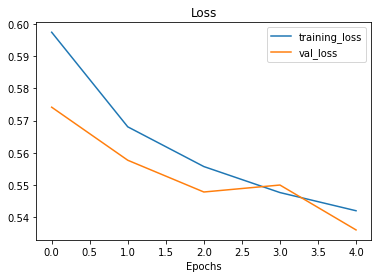

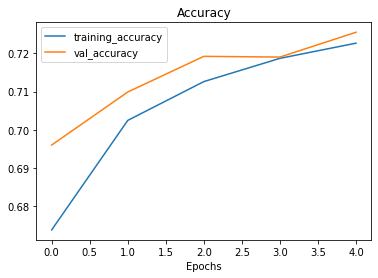

In [41]:
plot_loss_curves(history_1_1M)

In [48]:
tf.keras.models.save_model(higgs_model_1_1M,filepath = "/content/drive/MyDrive/higgs_model_1M" )

INFO:tensorflow:Assets written to: /content/drive/MyDrive/higgs_model_1M/assets


In [49]:
from sklearn.metrics import confusion_matrix

In [72]:
import numpy as np
y_pred = higgs_model_1_1M.predict(X_test_2)

y_pred_rev = y_pred > 0.7
y_pred_revised = np.array(y_pred_rev)
y_pred_revised = tf.squeeze(y_pred_revised)
y_pred_revised.shape


TensorShape([100000])

In [73]:
y_test_2.shape

(100000,)

In [74]:
from helper_functions import make_confusion_matrix

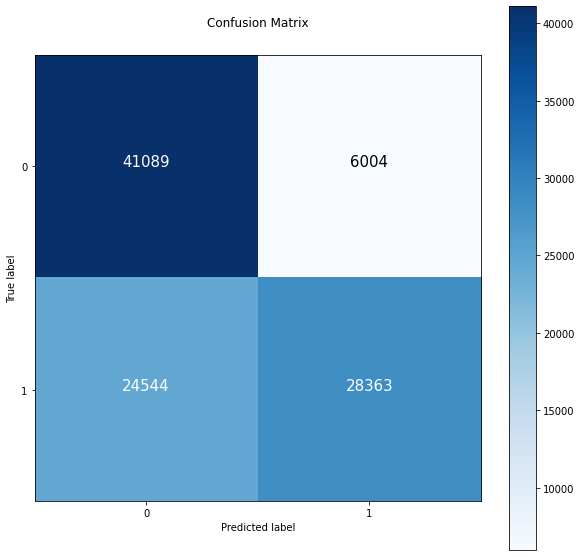

In [75]:
make_confusion_matrix(y_true= y_test_2, y_pred=y_pred_rev, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False)

In [76]:
y_pred = higgs_model_1_1M.predict(X_test_2)

y_pred_rev = y_pred > 0.85
y_pred_revised = np.array(y_pred_rev)
y_pred_revised = tf.squeeze(y_pred_revised)
y_pred_revised.shape

TensorShape([100000])

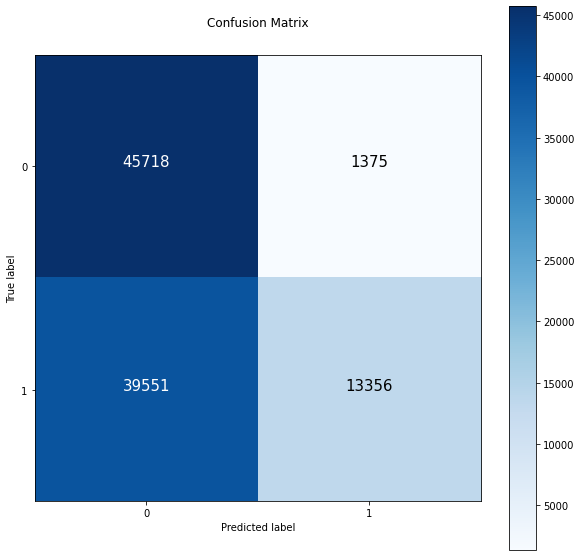

In [77]:
make_confusion_matrix(y_true= y_test_2, y_pred=y_pred_revised, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=True)

In [79]:
y_pred = higgs_model_1_1M.predict(X_test_2)

y_pred_rev = y_pred > 0.9
y_pred_revised = np.array(y_pred_rev)
y_pred_revised = tf.squeeze(y_pred_revised)
y_pred_revised.shape

TensorShape([100000])

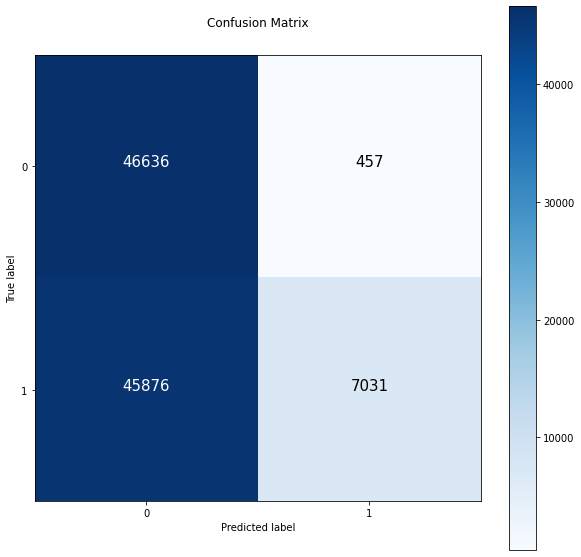

In [80]:
make_confusion_matrix(y_true= y_test_2, y_pred=y_pred_revised, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=True)

In [45]:
#collapse-output
!tensorboard dev upload --logdir ./higgs_noise_detection_model \
  --name "Higgs Dataset Background Noise detection model" \
  --description " A background noise detection model for higgs data set containing signals from LHC runs" \
  --one_shot # Exits the uploader once its finished uploading



***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./higgs_noise_detection_model

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) YES

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=UgvVITZ1H6juMnkCviqqbZmyz25Apz&prompt=consent&acc

### MODEL 4: Dataset with 1 Million Examples using Normalized Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
higgs_df_subset_1M = pd.read_csv("/content/drive/MyDrive/Higgs_Dataset_Subset/higgs_dataset_subset_1M.csv")

In [3]:
higgs_df_subset_1M

,labels,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.0,1.138683,-0.726635,-0.005790,0.204118,0.153842,1.585904,-0.045576,-1.448527,1.086538,...,-2.439800,0.073642,0.000000,1.790497,1.730592,0.980587,0.743065,2.378752,1.534863,1.227558
1,1.0,0.404633,1.014821,-1.050041,1.136441,-1.403536,3.218436,-1.944837,0.801788,0.000000,...,-1.174742,-0.912542,0.000000,1.072789,0.649697,0.981147,2.004577,0.521853,1.246037,1.461494
2,0.0,1.137585,0.325251,1.453598,0.804114,0.893516,0.418095,-1.164536,-0.585919,0.000000,...,0.280201,-0.982461,3.101961,0.816500,0.933867,0.988956,0.852772,0.415455,0.737194,0.691437
3,0.0,1.380438,-0.595149,-0.727112,0.465392,-0.057453,0.399224,-0.076273,1.080084,2.173076,...,1.261267,1.129085,0.000000,0.563342,0.857068,0.992465,0.875139,0.512037,0.686362,0.887047
4,1.0,0.962628,1.191110,-1.161568,1.541759,0.569159,1.337374,0.810973,0.458075,1.086538,...,0.413452,1.309431,3.101961,1.596246,1.146864,1.687726,1.178736,0.925320,1.094308,0.991339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1.0,0.721422,1.623552,1.477457,0.686271,-0.281346,1.012260,1.695248,-0.722296,0.000000,...,0.872338,-0.759387,0.000000,0.503514,1.064794,0.986955,1.028497,1.186128,1.021383,0.876147
999996,0.0,0.331612,-0.221145,-0.049624,1.204492,-0.422887,0.779944,-0.436717,0.490783,2.173076,...,-1.564503,-0.700011,0.000000,0.783572,1.037146,0.988166,1.016495,1.074260,0.905516,0.832388
999997,1.0,0.400790,0.846325,0.566930,1.019508,-0.907278,0.905446,-0.064390,1.379447,0.000000,...,0.252718,-0.656728,3.101961,0.675152,0.846188,0.982969,0.755627,0.690340,0.628058,0.613142
999998,1.0,1.094943,0.214219,-0.193333,1.558868,-0.447798,2.356229,-0.188169,1.575696,0.000000,...,0.600005,-0.633976,0.000000,1.553325,1.625376,1.000506,0.909016,0.317308,1.170940,1.174410


In [4]:
X_2  = higgs_df_subset_1M.drop(columns = "labels")
y_2 = higgs_df_subset_1M["labels"]
import sklearn
from sklearn.model_selection import train_test_split
X_train_2,X_test_2, y_train_2, y_test_2 = sklearn.model_selection.train_test_split(X_2,y_2, test_size=0.1, random_state=42, shuffle=True)


In [5]:

X_train_normalize = sklearn.preprocessing.normalize(X_train_2, norm='l2')
X_train_normalize
X_test_normalize = sklearn.preprocessing.normalize(X_test_2, norm='l2')
X_test_normalize

array([[ 0.07698427, -0.2064811 ,  0.14270308, ...,  0.17144011,
         0.30802015,  0.29493686],
       [ 0.17588701, -0.08943365,  0.0814417 , ...,  0.15250059,
         0.18445288,  0.16348773],
       [ 0.28982145, -0.03753603, -0.14026131, ...,  0.17654363,
         0.18631549,  0.18275347],
       ...,
       [ 0.19341948,  0.15594531, -0.2644997 , ...,  0.04310668,
         0.13831779,  0.18432919],
       [ 0.12775341, -0.29667257, -0.21784223, ...,  0.16247403,
         0.12411202,  0.1180993 ],
       [ 0.05182394, -0.07203228, -0.2407318 , ...,  0.11954834,
         0.13920714,  0.14846587]])

In [6]:

X_train_normalize.shape

(900000, 28)

In [7]:
import tensorflow as tf
tf.random.set_seed(42)

higgs_model_1_normalize_1M = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

higgs_model_1_normalize_1M.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ['accuracy'])

history_1_normalize_1M = higgs_model_1_normalize_1M.fit(X_train_normalize, y_train_2, epochs = 5, validation_data = (X_test_normalize,y_test_2))

Epoch 1/5
28125/28125 [==============================] - 113s 4ms/step - loss: 0.6003 - accuracy: 0.6728 - val_loss: 0.5795 - val_accuracy: 0.6932
Epoch 2/5
28125/28125 [==============================] - 92s 3ms/step - loss: 0.5726 - accuracy: 0.6991 - val_loss: 0.5668 - val_accuracy: 0.7039
Epoch 3/5
28125/28125 [==============================] - 86s 3ms/step - loss: 0.5633 - accuracy: 0.7068 - val_loss: 0.5569 - val_accuracy: 0.7121
Epoch 4/5
28125/28125 [==============================] - 89s 3ms/step - loss: 0.5568 - accuracy: 0.7115 - val_loss: 0.5622 - val_accuracy: 0.7081
Epoch 5/5
28125/28125 [==============================] - 84s 3ms/step - loss: 0.5517 - accuracy: 0.7153 - val_loss: 0.5488 - val_accuracy: 0.7160


In [8]:
y_pred = higgs_model_1_normalize_1M.predict(X_test_normalize)

y_pred_rev = y_pred > 0.9
y_pred_revised = np.array(y_pred_rev)
y_pred_revised = tf.squeeze(y_pred_revised)
y_pred_revised.shape

TensorShape([100000])

In [9]:
y_pred = higgs_model_1_normalize_1M.predict(X_test_2)

y_pred_rev = y_pred > 0.9
y_pred_revised = np.array(y_pred_rev)
y_pred_revised = tf.squeeze(y_pred_revised)
y_pred_revised.shape

TensorShape([100000])

In [10]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import make_confusion_matrix

--2022-03-22 11:54:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-03-22 11:54:47 (85.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



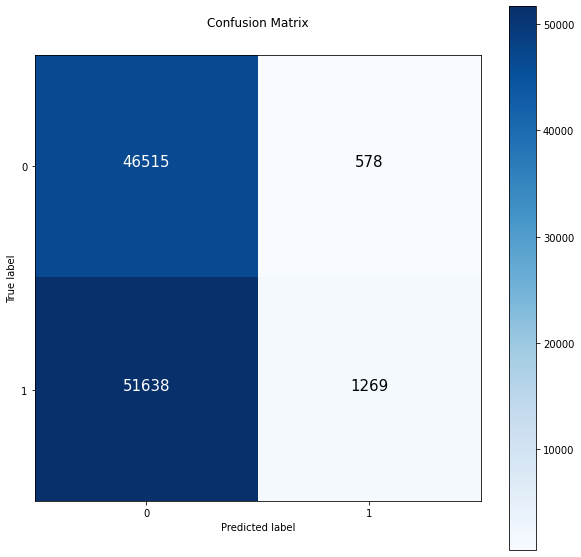

In [11]:
make_confusion_matrix(y_true= y_test_2, y_pred=y_pred_revised, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=True)

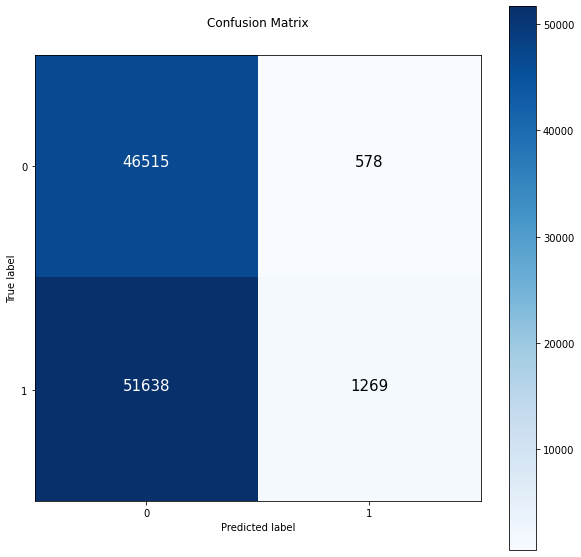

In [21]:
make_confusion_matrix(y_true= y_test_2, y_pred=y_pred_revised, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=True)

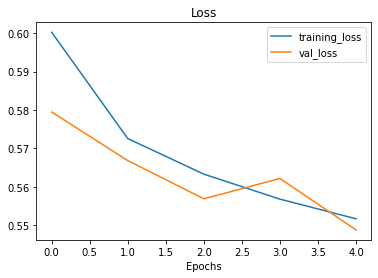

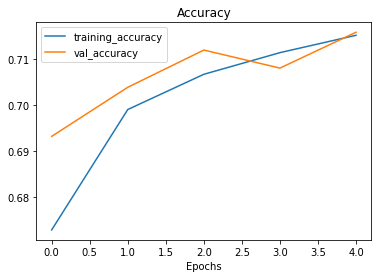

In [12]:
from helper_functions import plot_loss_curves
plot_loss_curves(history_1_normalize_1M)

In [13]:
import tensorflow as tf
tf.random.set_seed(42)

higgs_model_2_normalize_1M = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

higgs_model_2_normalize_1M.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                      metrics = ['accuracy'])

history_2_normalize_1M = higgs_model_1_normalize_1M.fit(X_train_normalize, y_train_2, epochs = 5, validation_data = (X_test_normalize,y_test_2))

Epoch 1/5
28125/28125 [==============================] - 93s 3ms/step - loss: 0.5478 - accuracy: 0.7180 - val_loss: 0.5450 - val_accuracy: 0.7208
Epoch 2/5
28125/28125 [==============================] - 95s 3ms/step - loss: 0.5449 - accuracy: 0.7204 - val_loss: 0.5455 - val_accuracy: 0.7201
Epoch 3/5
28125/28125 [==============================] - 94s 3ms/step - loss: 0.5423 - accuracy: 0.7224 - val_loss: 0.5380 - val_accuracy: 0.7249
Epoch 4/5
28125/28125 [==============================] - 99s 4ms/step - loss: 0.5401 - accuracy: 0.7239 - val_loss: 0.5449 - val_accuracy: 0.7200
Epoch 5/5
28125/28125 [==============================] - 104s 4ms/step - loss: 0.5381 - accuracy: 0.7253 - val_loss: 0.5365 - val_accuracy: 0.7258


In [21]:
y_pred = higgs_model_2_normalize_1M.predict(X_test_2)

y_pred_rev = y_pred > 0.6
y_pred_revised = np.array(y_pred_rev)
y_pred_revised = tf.squeeze(y_pred_revised)
y_pred_revised.shape

TensorShape([100000])

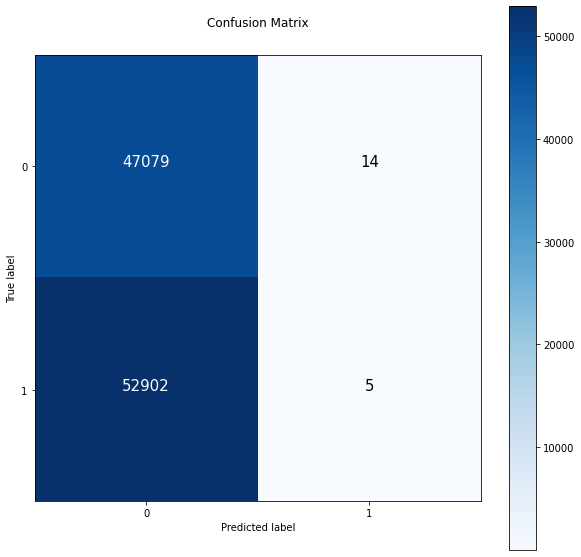

In [22]:
make_confusion_matrix(y_true= y_test_2, y_pred=y_pred_revised, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=True)

In [16]:
tf.keras.models.save_model(higgs_model_2_normalize_1M,filepath = "/content/drive/MyDrive/higgs_model_2_normalize_1M" )

INFO:tensorflow:Assets written to: /content/drive/MyDrive/higgs_model_2_normalize_1M/assets


In [24]:
from helper_functions import create_tensorboard_callback

In [26]:
import tensorflow as tf
tf.random.set_seed(42)

higgs_model_3_normalize_1M = tf.keras.Sequential([
  tf.keras.layers.Dense(300, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

higgs_model_3_normalize_1M.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05),
                      metrics = ['accuracy'])

history_3_normalize_1M = higgs_model_3_normalize_1M.fit(X_train_normalize, y_train_2, epochs = 5, validation_data = (X_test_normalize,y_test_2),callbacks =[create_tensorboard_callback(dir_name = "higgs_noise_detection_model_with_300_units", experiment_name='HIGGS_MODEL_NOISE_DETECTION_WITH_1M_300HIDDENUNITS')])

Saving TensorBoard log files to: higgs_noise_detection_model_with_300_units/HIGGS_MODEL_NOISE_DETECTION_WITH_1M_300HIDDENUNITS/20220322-125120
Epoch 1/5
28125/28125 [==============================] - 98s 3ms/step - loss: 0.6236 - accuracy: 0.6521 - val_loss: 0.6204 - val_accuracy: 0.6639
Epoch 2/5
28125/28125 [==============================] - 100s 4ms/step - loss: 0.6160 - accuracy: 0.6635 - val_loss: 0.6197 - val_accuracy: 0.6569
Epoch 3/5
28125/28125 [==============================] - 104s 4ms/step - loss: 0.6152 - accuracy: 0.6652 - val_loss: 0.6173 - val_accuracy: 0.6715
Epoch 4/5
28125/28125 [==============================] - 99s 4ms/step - loss: 0.6150 - accuracy: 0.6651 - val_loss: 0.6198 - val_accuracy: 0.6669
Epoch 5/5
28125/28125 [==============================] - 99s 4ms/step - loss: 0.6144 - accuracy: 0.6656 - val_loss: 0.6094 - val_accuracy: 0.6725


In [27]:
y_pred = higgs_model_3_normalize_1M.predict(X_test_normalize)

y_pred_rev = y_pred > 0.9
y_pred_revised = np.array(y_pred_rev)
y_pred_revised = tf.squeeze(y_pred_revised)
y_pred_revised.shape

TensorShape([100000])

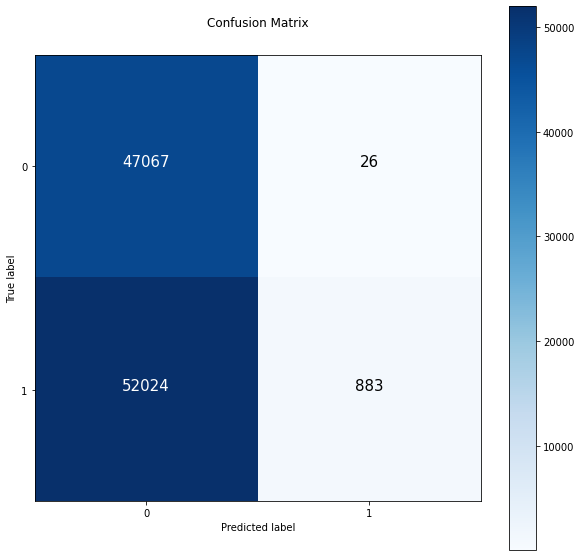

In [28]:
make_confusion_matrix(y_true= y_test_2, y_pred=y_pred_revised, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=True)

In [35]:
higgs_model_2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.7336 - accuracy: 0.5635


[2.7335827350616455, 0.5634999871253967]

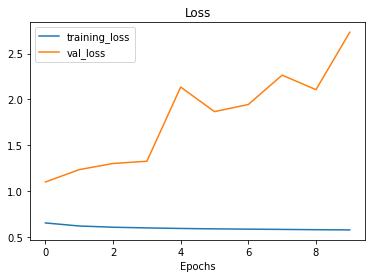

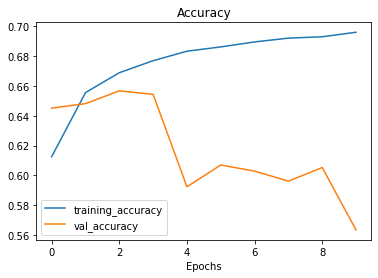

In [36]:
plot_loss_curves(history_2)

In [37]:
tf.random.set_seed(42)

higgs_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

higgs_model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ['accuracy'])

history_3 = higgs_model_3.fit(X_train_normalize, y_train, epochs = 5, validation_data = (X_test,y_test))

Epoch 1/5
2813/2813 [==============================] - 12s 4ms/step - loss: 0.6455 - accuracy: 0.6213 - val_loss: 1.1575 - val_accuracy: 0.6536
Epoch 2/5
2813/2813 [==============================] - 12s 4ms/step - loss: 0.6087 - accuracy: 0.6647 - val_loss: 1.2744 - val_accuracy: 0.6539
Epoch 3/5
2813/2813 [==============================] - 12s 4ms/step - loss: 0.5959 - accuracy: 0.6773 - val_loss: 1.4428 - val_accuracy: 0.6607
Epoch 4/5
2813/2813 [==============================] - 11s 4ms/step - loss: 0.5887 - accuracy: 0.6850 - val_loss: 1.4042 - val_accuracy: 0.6596
Epoch 5/5
2813/2813 [==============================] - 12s 4ms/step - loss: 0.5825 - accuracy: 0.6907 - val_loss: 2.2254 - val_accuracy: 0.5800


In [38]:
higgs_model_3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.2254 - accuracy: 0.5800


[2.225376605987549, 0.5799999833106995]

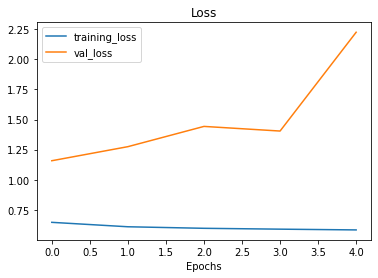

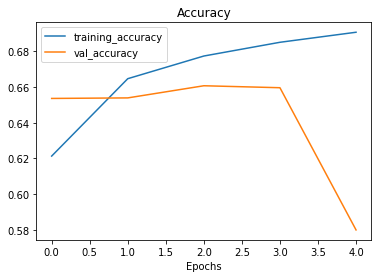

In [39]:
plot_loss_curves(history_3)

### References:  
* [Higgs Dataset UCI Machine learning Repository](https://archive.ics.uci.edu/ml/datasets/HIGGS)
* [Tensorflow documentation](https://www.tensorflow.org/api_docs)
* [Scikit Learn Preprocessing Documentation](https://scikit-learn.org/stable/modules/preprocessing.html)
